Import Libraries

In [232]:
# Import all libraries used including the libraries that were used to determine the best model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
import glob
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import openpyxl
import pickle

In [233]:
#set working directory to where data is stored
os.chdir(r"C:\Users\belbi\OneDrive\Documents\GCU\Capstone\Data\All Data")

In [234]:
#get filenames of all datafiles
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['redfin_2022-11-06-15-36-04.csv',
 'redfin_2022-11-06-15-54-57.csv',
 'redfin_2022-11-06-15-55-50.csv',
 'redfin_2022-11-06-15-56-31.csv',
 'redfin_2022-11-06-15-57-35.csv',
 'redfin_2022-11-06-15-58-16.csv',
 'redfin_2022-11-06-15-59-07.csv',
 'redfin_2022-11-06-15-59-57.csv',
 'redfin_2022-11-06-16-00-40.csv',
 'redfin_2022-11-06-16-01-03.csv',
 'redfin_2022-11-06-16-02-21.csv',
 'redfin_2022-11-06-16-04-07.csv',
 'redfin_2022-11-06-16-04-47.csv',
 'redfin_2022-11-06-16-07-10.csv',
 'redfin_2022-11-06-16-07-54.csv',
 'redfin_2022-11-06-16-08-30.csv',
 'redfin_2022-11-06-16-08-59.csv',
 'redfin_2022-11-06-16-09-39.csv',
 'redfin_2022-11-06-16-09-57.csv',
 'redfin_2022-11-06-16-10-12.csv',
 'redfin_2022-11-06-16-10-30.csv',
 'redfin_2022-11-06-16-11-00.csv',
 'redfin_2022-11-06-16-11-16.csv',
 'redfin_2022-11-06-16-11-32.csv',
 'redfin_2022-11-06-16-12-13.csv',
 'redfin_2022-11-06-16-12-24.csv',
 'redfin_2022-11-06-16-12-50.csv',
 'redfin_2022-11-06-16-13-03.csv',
 'redfin_2022-11-06-

In [235]:
#build the dataframe by appending each file to the dataframe
df_append = pd.DataFrame()
for file in csv_files:
    df_temp = pd.read_csv(file)
    df_append = df_append.append(df_temp, ignore_index = True)
df_append

C:\Users\belbi\AppData\Local\Temp\ipykernel_123424\1639621125.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index = True)
C:\Users\belbi\AppData\Local\Temp\ipykernel_123424\1639621125.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index = True)
C:\Users\belbi\AppData\Local\Temp\ipykernel_123424\1639621125.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index = True)
C:\Users\belbi\AppData\Local\Temp\ipykernel_123424\1639621125.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append =

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,POOL
0,PAST SALE,NaN,Single Family Residential,1846 E Willetta St,Phoenix,AZ,85006.0,210000.0,NaN,1.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1846-E-Wille...,NaN,NaN,N,Y,33.463985,-112.041373,Y
1,PAST SALE,NaN,Single Family Residential,1515 E Brill St,Phoenix,AZ,85006.0,360000.0,NaN,1.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1515-E-Brill...,NaN,NaN,N,Y,33.464534,-112.049151,Y
2,PAST SALE,NaN,Single Family Residential,1632 E Granada Rd,Phoenix,AZ,85006.0,245000.0,NaN,1.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1632-E-Grana...,NaN,NaN,N,Y,33.468711,-112.046170,Y
3,PAST SALE,September-16-2022,Single Family Residential,1113 W PORTLAND St,Phoenix,AZ,85007.0,780000.0,4.0,2.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1113-W-Portl...,ARMLS,6425854.0,N,Y,33.459457,-112.087766,Y
4,PAST SALE,NaN,Single Family Residential,946 W Cocopah St,Phoenix,AZ,85007.0,258000.0,NaN,1.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/946-W-Cocopa...,NaN,NaN,N,Y,33.432397,-112.086411,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15952,PAST SALE,October-31-2022,Single Family Residential,41338 N PARKER Ln,Anthem,AZ,85086.0,445000.0,3.0,2.5,...,NaN,NaN,https://www.redfin.com/AZ/Anthem/41338-N-Parke...,ARMLS,6413146.0,N,Y,33.860173,-112.139598,N
15953,PAST SALE,December-12-2022,Single Family Residential,1646 W OWENS Way,Anthem,AZ,85086.0,375000.0,2.0,2.0,...,NaN,NaN,https://www.redfin.com/AZ/Anthem/1646-W-Owens-...,ARMLS,6423456.0,N,Y,33.850329,-112.095167,N
15954,PAST SALE,December-16-2022,Single Family Residential,39807 N CROSS TIMBERS Way,Anthem,AZ,85086.0,430000.0,3.0,2.0,...,NaN,NaN,https://www.redfin.com/AZ/Anthem/39807-N-Cross...,ARMLS,6418550.0,N,Y,33.846145,-112.118314,N
15955,PAST SALE,NaN,Single Family Residential,1811 W Jomax Rd,Phoenix,AZ,85085.0,453492.0,NaN,NaN,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1811-W-Jomax...,NaN,NaN,N,Y,33.725537,-112.098731,N


In [236]:
df = df_append

In [237]:
#explore the first five rows of data
df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,POOL
0,PAST SALE,NaN,Single Family Residential,1846 E Willetta St,Phoenix,AZ,85006.0,210000.0,NaN,1.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1846-E-Wille...,NaN,NaN,N,Y,33.463985,-112.041373,Y
1,PAST SALE,NaN,Single Family Residential,1515 E Brill St,Phoenix,AZ,85006.0,360000.0,NaN,1.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1515-E-Brill...,NaN,NaN,N,Y,33.464534,-112.049151,Y
2,PAST SALE,NaN,Single Family Residential,1632 E Granada Rd,Phoenix,AZ,85006.0,245000.0,NaN,1.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1632-E-Grana...,NaN,NaN,N,Y,33.468711,-112.046170,Y
3,PAST SALE,September-16-2022,Single Family Residential,1113 W PORTLAND St,Phoenix,AZ,85007.0,780000.0,4.0,2.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/1113-W-Portl...,ARMLS,6425854.0,N,Y,33.459457,-112.087766,Y
4,PAST SALE,NaN,Single Family Residential,946 W Cocopah St,Phoenix,AZ,85007.0,258000.0,NaN,1.0,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/946-W-Cocopa...,NaN,NaN,N,Y,33.432397,-112.086411,Y


In [238]:
#view statistics on all columns in the data
df.describe(include='all')

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,POOL
count,15957,12844,15957,15944,15944,15957,15944.000000,1.594100e+04,12908.000000,15876.000000,...,0.0,0.0,15957,12860,1.284400e+04,15957,15957,15957.000000,15957.000000,15957
unique,1,348,7,11098,11,1,NaN,NaN,NaN,NaN,...,NaN,NaN,11094,3,NaN,1,1,NaN,NaN,3
top,PAST SALE,February-28-2022,Single Family Residential,4115 E CORONADO Rd,Phoenix,AZ,NaN,NaN,NaN,NaN,...,NaN,NaN,https://www.redfin.com/AZ/Phoenix/4115-E-Coron...,ARMLS,NaN,N,Y,NaN,NaN,N
freq,15957,121,15892,10,14879,15957,NaN,NaN,NaN,NaN,...,NaN,NaN,10,12858,NaN,15957,15957,NaN,NaN,12031
mean,NaN,NaN,NaN,NaN,NaN,NaN,85046.772579,3.775752e+05,3.232259,2.007335,...,NaN,NaN,NaN,NaN,6.380650e+06,NaN,NaN,33.523069,-112.113959,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,69.586668,7.977971e+04,0.693733,1.479396,...,NaN,NaN,NaN,NaN,1.575709e+05,NaN,NaN,0.104995,0.077462,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,85003.000000,1.500000e+04,0.000000,0.750000,...,NaN,NaN,NaN,NaN,1.044944e+06,NaN,NaN,33.291952,-112.324952,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,85019.000000,3.350000e+05,3.000000,2.000000,...,NaN,NaN,NaN,NaN,6.333400e+06,NaN,NaN,33.464468,-112.151475,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,85032.000000,3.850000e+05,3.000000,2.000000,...,NaN,NaN,NaN,NaN,6.375800e+06,NaN,NaN,33.503106,-112.117802,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,85042.000000,4.350000e+05,4.000000,2.000000,...,NaN,NaN,NaN,NaN,6.426282e+06,NaN,NaN,33.602997,-112.054088,NaN


In [239]:
#look for any null values contained in columns
df.isnull().sum()


SALE TYPE                                                                                          0
SOLD DATE                                                                                       3113
PROPERTY TYPE                                                                                      0
ADDRESS                                                                                           13
CITY                                                                                              13
STATE OR PROVINCE                                                                                  0
ZIP OR POSTAL CODE                                                                                13
PRICE                                                                                             16
BEDS                                                                                            3049
BATHS                                                                                      

In [240]:
#view the data types for each of the columns in the data
df.dtypes

SALE TYPE                                                                                       object
SOLD DATE                                                                                       object
PROPERTY TYPE                                                                                   object
ADDRESS                                                                                         object
CITY                                                                                            object
STATE OR PROVINCE                                                                               object
ZIP OR POSTAL CODE                                                                             float64
PRICE                                                                                          float64
BEDS                                                                                           float64
BATHS                                                                    

In [241]:
#convert the sold date to a date
date_string = df['SOLD DATE']
df['SOLDDATE'] = pd.to_datetime(date_string)
df.drop('SOLD DATE', axis = 1)

,SALE TYPE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,...,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,POOL,SOLDDATE
0,PAST SALE,Single Family Residential,1846 E Willetta St,Phoenix,AZ,85006.0,210000.0,NaN,1.0,NaN,...,NaN,https://www.redfin.com/AZ/Phoenix/1846-E-Wille...,NaN,NaN,N,Y,33.463985,-112.041373,Y,NaT
1,PAST SALE,Single Family Residential,1515 E Brill St,Phoenix,AZ,85006.0,360000.0,NaN,1.0,NaN,...,NaN,https://www.redfin.com/AZ/Phoenix/1515-E-Brill...,NaN,NaN,N,Y,33.464534,-112.049151,Y,NaT
2,PAST SALE,Single Family Residential,1632 E Granada Rd,Phoenix,AZ,85006.0,245000.0,NaN,1.0,NaN,...,NaN,https://www.redfin.com/AZ/Phoenix/1632-E-Grana...,NaN,NaN,N,Y,33.468711,-112.046170,Y,NaT
3,PAST SALE,Single Family Residential,1113 W PORTLAND St,Phoenix,AZ,85007.0,780000.0,4.0,2.0,F O STORY ADDITION PLAT C,...,NaN,https://www.redfin.com/AZ/Phoenix/1113-W-Portl...,ARMLS,6425854.0,N,Y,33.459457,-112.087766,Y,2022-09-16
4,PAST SALE,Single Family Residential,946 W Cocopah St,Phoenix,AZ,85007.0,258000.0,NaN,1.0,NaN,...,NaN,https://www.redfin.com/AZ/Phoenix/946-W-Cocopa...,NaN,NaN,N,Y,33.432397,-112.086411,Y,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15952,PAST SALE,Single Family Residential,41338 N PARKER Ln,Anthem,AZ,85086.0,445000.0,3.0,2.5,ANTHEM UNIT 41B,...,NaN,https://www.redfin.com/AZ/Anthem/41338-N-Parke...,ARMLS,6413146.0,N,Y,33.860173,-112.139598,N,2022-10-31
15953,PAST SALE,Single Family Residential,1646 W OWENS Way,Anthem,AZ,85086.0,375000.0,2.0,2.0,ANTHEM COUNTRY CLUB UNIT 32,...,NaN,https://www.redfin.com/AZ/Anthem/1646-W-Owens-...,ARMLS,6423456.0,N,Y,33.850329,-112.095167,N,2022-12-12
15954,PAST SALE,Single Family Residential,39807 N CROSS TIMBERS Way,Anthem,AZ,85086.0,430000.0,3.0,2.0,Anthem Parkside,...,NaN,https://www.redfin.com/AZ/Anthem/39807-N-Cross...,ARMLS,6418550.0,N,Y,33.846145,-112.118314,N,2022-12-16
15955,PAST SALE,Single Family Residential,1811 W Jomax Rd,Phoenix,AZ,85085.0,453492.0,NaN,NaN,NaN,...,NaN,https://www.redfin.com/AZ/Phoenix/1811-W-Jomax...,NaN,NaN,N,Y,33.725537,-112.098731,N,NaT


In [242]:
#add weekly posted mortgage rate for each sale
df2 = (pd.read_excel(r"C:\Users\belbi\PycharmProject\Capstone\historicaldata.xlsx", sheet_name='Sheet1'))

In [243]:
df2.head()

,Day,Rate
0,2021-08-01,2.77
1,2021-08-02,2.77
2,2021-08-03,2.77
3,2021-08-04,2.77
4,2021-08-05,2.87


In [244]:
df2.dtypes

Day     datetime64[ns]
Rate           float64
dtype: object

In [245]:
left_join = (pd.merge(df,
                     df2,
                     left_on='SOLDDATE', right_on='Day',
                      how='left')
             .drop('Day',axis=1))

In [246]:
df = left_join
df = df.rename(columns = {'Rate':'RATE'})

In [247]:
df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,POOL,SOLDDATE,RATE
0,PAST SALE,NaN,Single Family Residential,1846 E Willetta St,Phoenix,AZ,85006.0,210000.0,NaN,1.0,...,https://www.redfin.com/AZ/Phoenix/1846-E-Wille...,NaN,NaN,N,Y,33.463985,-112.041373,Y,NaT,NaN
1,PAST SALE,NaN,Single Family Residential,1515 E Brill St,Phoenix,AZ,85006.0,360000.0,NaN,1.0,...,https://www.redfin.com/AZ/Phoenix/1515-E-Brill...,NaN,NaN,N,Y,33.464534,-112.049151,Y,NaT,NaN
2,PAST SALE,NaN,Single Family Residential,1632 E Granada Rd,Phoenix,AZ,85006.0,245000.0,NaN,1.0,...,https://www.redfin.com/AZ/Phoenix/1632-E-Grana...,NaN,NaN,N,Y,33.468711,-112.046170,Y,NaT,NaN
3,PAST SALE,September-16-2022,Single Family Residential,1113 W PORTLAND St,Phoenix,AZ,85007.0,780000.0,4.0,2.0,...,https://www.redfin.com/AZ/Phoenix/1113-W-Portl...,ARMLS,6425854.0,N,Y,33.459457,-112.087766,Y,2022-09-16,6.29
4,PAST SALE,NaN,Single Family Residential,946 W Cocopah St,Phoenix,AZ,85007.0,258000.0,NaN,1.0,...,https://www.redfin.com/AZ/Phoenix/946-W-Cocopa...,NaN,NaN,N,Y,33.432397,-112.086411,Y,NaT,NaN


In [248]:
#removing data without MLS# as these most likely represent private sales
df = df.dropna(subset=['MLS#'],axis=0)

In [249]:
#after removing the data without MLS# determine how many columns still contain null values
df.isnull().sum()

SALE TYPE                                                                                          0
SOLD DATE                                                                                          0
PROPERTY TYPE                                                                                      0
ADDRESS                                                                                            0
CITY                                                                                               0
STATE OR PROVINCE                                                                                  0
ZIP OR POSTAL CODE                                                                                 0
PRICE                                                                                              0
BEDS                                                                                               0
BATHS                                                                                      

In [250]:
#remove the rows of data where the bed, baths or lotsize data is missing
df = df.dropna(subset=['BEDS'],axis=0)
df = df.dropna(subset=['BATHS'],axis=0)
df = df.dropna(subset=['LOT SIZE'],axis=0)

In [251]:
#build an HOA data object based on whether there is an amount in the HOA/month column
df['HOA'] = np.where(df['HOA/MONTH'] > 0 ,1, 0)

In [252]:
#convert the Pool Y/N data to 1/0 values based on Y =1 and all else is 0
df['POOL'] = np.where(df['POOL'] == 'Y', 1,0)

In [253]:
#view the dataframe after making the changes above
df

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,POOL,SOLDDATE,RATE,HOA
3,PAST SALE,September-16-2022,Single Family Residential,1113 W PORTLAND St,Phoenix,AZ,85007.0,780000.0,4.0,2.0,...,ARMLS,6425854.0,N,Y,33.459457,-112.087766,1,2022-09-16,6.29,0
5,PAST SALE,September-9-2022,Single Family Residential,1425 E PORTLAND St,Phoenix,AZ,85006.0,385000.0,2.0,1.0,...,ARMLS,6454396.0,N,Y,33.460299,-112.050874,1,2022-09-09,6.02,0
6,PAST SALE,August-8-2022,Single Family Residential,1501 W Willetta St,Phoenix,AZ,85007.0,649999.0,3.0,3.0,...,ARMLS,6388381.0,N,Y,33.463507,-112.091487,1,2022-08-08,5.22,0
8,PAST SALE,August-29-2022,Single Family Residential,1515 W YAVAPAI St W,Phoenix,AZ,85007.0,350000.0,4.0,2.0,...,ARMLS,6433870.0,N,Y,33.435667,-112.092093,1,2022-08-29,5.66,0
9,PAST SALE,September-30-2022,Single Family Residential,810 S 3RD Ave,Phoenix,AZ,85003.0,614000.0,4.0,3.0,...,ARMLS,6388579.0,N,Y,33.439645,-112.077468,1,2022-09-30,6.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15950,PAST SALE,December-6-2022,Single Family Residential,40759 N TRAILHEAD Way,Phoenix,AZ,85086.0,375000.0,3.0,2.0,...,ARMLS,6424472.0,N,Y,33.854819,-112.114076,0,2022-12-06,6.33,1
15951,PAST SALE,December-30-2022,Single Family Residential,39768 N HIGH NOON Way,Phoenix,AZ,85086.0,460000.0,5.0,2.5,...,ARMLS,6440522.0,N,Y,33.845741,-112.119805,0,2022-12-30,6.48,1
15952,PAST SALE,October-31-2022,Single Family Residential,41338 N PARKER Ln,Anthem,AZ,85086.0,445000.0,3.0,2.5,...,ARMLS,6413146.0,N,Y,33.860173,-112.139598,0,2022-10-31,6.95,1
15953,PAST SALE,December-12-2022,Single Family Residential,1646 W OWENS Way,Anthem,AZ,85086.0,375000.0,2.0,2.0,...,ARMLS,6423456.0,N,Y,33.850329,-112.095167,0,2022-12-12,6.31,1


In [254]:
# select the columns to be used in the model as well as the app for analysis
#rename long column names and remove spaces in column names
data = df[['SOLDDATE','ADDRESS','CITY','STATE OR PROVINCE','ZIP OR POSTAL CODE','PRICE','BEDS','BATHS','SQUARE FEET','LOT SIZE','YEAR BUILT','MLS#','POOL','HOA','LATITUDE','LONGITUDE','RATE']]
data = data.rename(columns = {'ZIP OR POSTAL CODE':'ZIPCODE'})
data = data.rename(columns = {'SQUARE FEET':'SQFT'})
data = data.rename(columns = {'LOT SIZE':'LOTSIZE'})
data = data.rename(columns = {'YEAR BUILT':'YEARBUILT'})

In [255]:
#limit the dataset to sold price of less than $500k
data = data[data.PRICE <500000]

In [256]:
#Remove zipcodes captured that are not Phoenix
data = data[data.ZIPCODE < 85099]


In [257]:
#Remove Duplicates and view shape of the data
data.duplicated().sum()
data.drop_duplicates
data.shape

(11936, 17)

In [258]:
#Verify that there are no missing values in the new dataset
data.isnull().sum()

SOLDDATE             0
ADDRESS              0
CITY                 0
STATE OR PROVINCE    0
ZIPCODE              0
PRICE                0
BEDS                 0
BATHS                0
SQFT                 0
LOTSIZE              0
YEARBUILT            0
MLS#                 0
POOL                 0
HOA                  0
LATITUDE             0
LONGITUDE            0
RATE                 0
dtype: int64

In [259]:
#covert zipcode to category data for one hot encoding
data['ZIPCODE']=data['ZIPCODE'].astype('int64')
data['YEARBUILT']=data['YEARBUILT'].astype('int64')
data['SQFT']=data['SQFT'].astype('int64')
data['LOTSIZE']=data['LOTSIZE'].astype('int64')
data['BEDS']=data['BEDS'].astype('int32')

#### Exploratory Data Analysis
Explore Price

{'whiskers': [<matplotlib.lines.Line2D at 0x2f68059bdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2f680593340>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f68059bb20>],
 'medians': [<matplotlib.lines.Line2D at 0x2f680593880>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f680593b20>],
 'means': []}

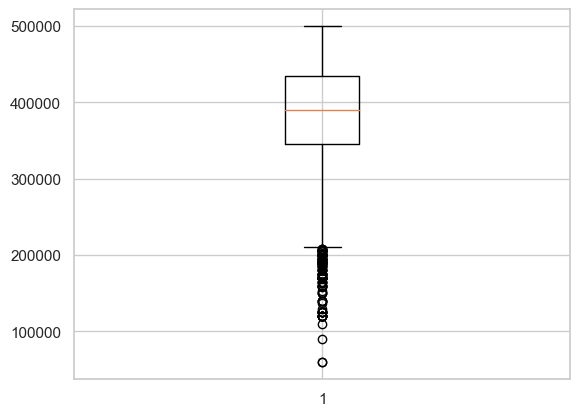

In [260]:
#original view of price to determine outliers that need to be removed

plt.boxplot(data['PRICE'])


In [261]:
#remove outliers less than 220,000
data = data[data.PRICE>220000]

{'whiskers': [<matplotlib.lines.Line2D at 0x2f684cd86a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2f684cd8a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f684cd8400>],
 'medians': [<matplotlib.lines.Line2D at 0x2f684ca7040>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f684ca72e0>],
 'means': []}

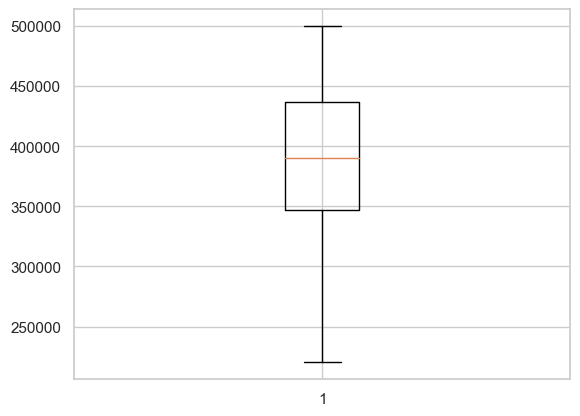

In [262]:
#view after removing the outliers
plt.boxplot(data['PRICE'])

Compare house size to price

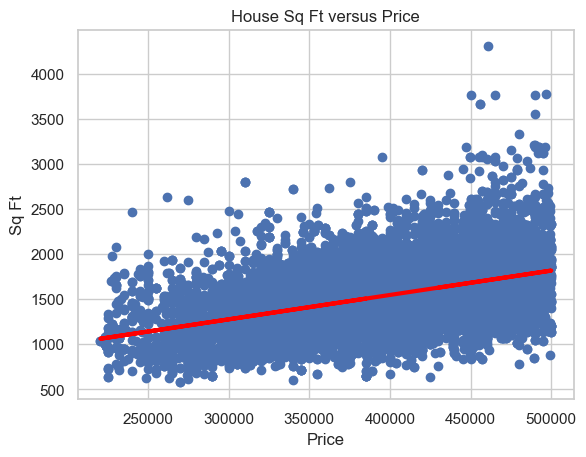

In [263]:
x=data['PRICE']
y=data['SQFT']
plt.scatter(x,y)
plt.title('House Sq Ft versus Price')
plt.xlabel('Price')
plt.ylabel('Sq Ft')

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x), color ='red', linewidth=3)

Compare number of bedrooms to price

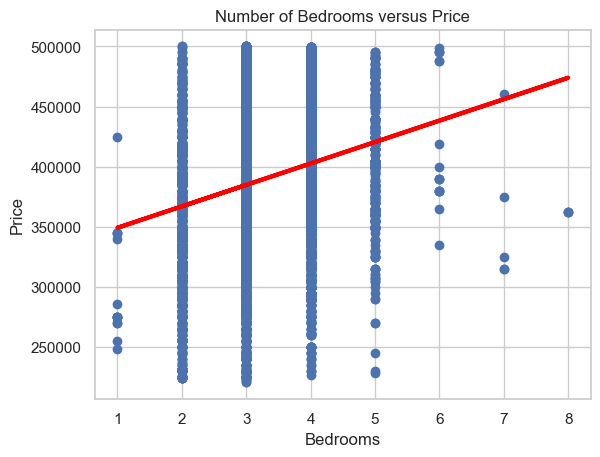

In [264]:
y=data['PRICE']
x=data['BEDS']
plt.scatter(x,y)
plt.title('Number of Bedrooms versus Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x), color ='red', linewidth=3)

Histogram of number of Bedrooms

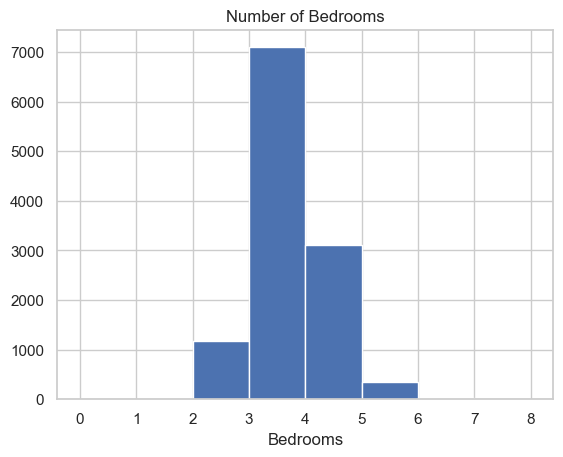

In [265]:
plt.hist(data['BEDS'], bins= [0,1,2,3,4,5,6,7,8])
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2f684f02730>,
 'caps': [<matplotlib.lines.Line2D at 0x2f684f02a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f684f02100>],
 'medians': [<matplotlib.lines.Line2D at 0x2f6857fa070>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f6857faf10>],
 'means': []}

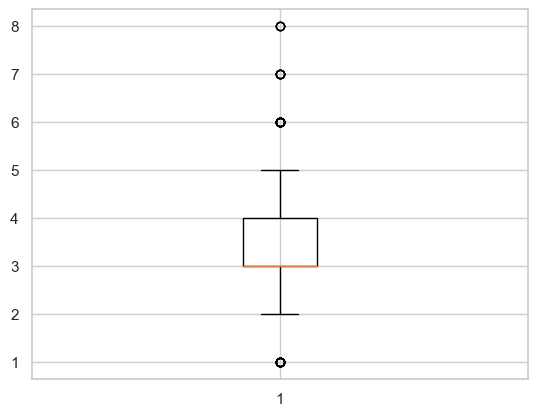

In [266]:
#View the distribution of the number of bedrooms to identify outliers
plt.boxplot(data['BEDS'])

In [267]:
#remove the 1 bedroom and more than 5 bedrooms
data = data[data.BEDS <6]

In [268]:
data = data[data.BEDS>1]


<AxesSubplot: xlabel='BEDS', ylabel='PRICE'>

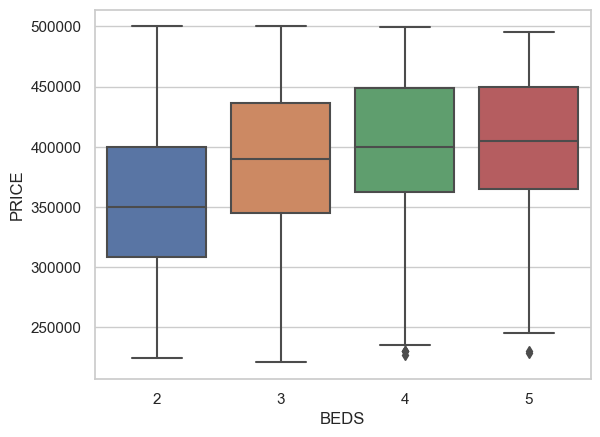

In [269]:
# view the beds by price to see relationship and identify outliers
sn.set(style = 'whitegrid')
sn.boxplot(x='BEDS',
           y='PRICE',
           data = data)

In [270]:
#Remove houses with 4+ bedrooms and sold for less than 250,000
dataremove = data[(data['BEDS']>=4) & (data['PRICE']< 250000)].index
data.drop(dataremove,inplace=True)

sn.set(style = 'whitegrid')
sn.boxplot(x='BEDS',
           y='PRICE',
           data = data)

Compare number of bathrooms to price

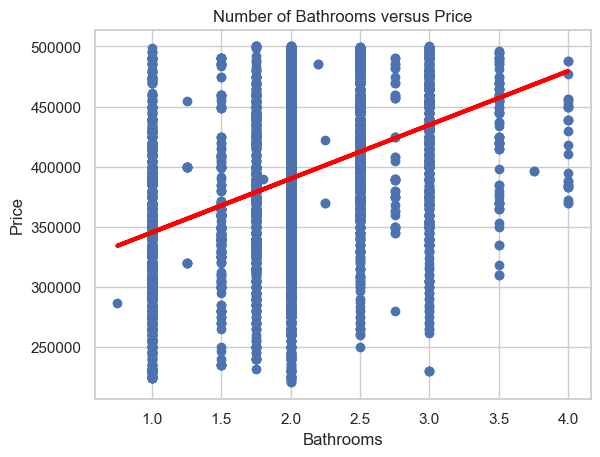

In [271]:
y=data['PRICE']
x=data['BATHS']
plt.scatter(x,y)
plt.title('Number of Bathrooms versus Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x), color ='red', linewidth=3)


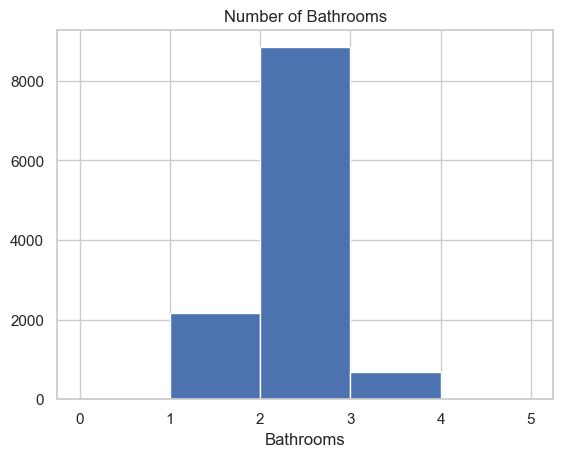

In [272]:
# view the distribution of bathrooms
plt.hist(data['BATHS'], bins= [0,1,2,3,4,5])
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2f68582d1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2f68582dca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f6858360d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2f68582d2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f68582dcd0>],
 'means': []}

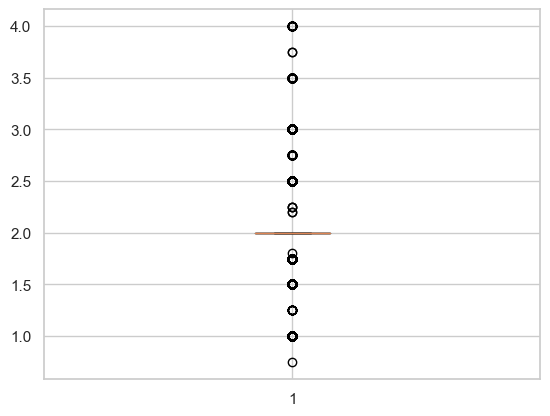

In [273]:
#identify outliers in the number of bathrooms
plt.boxplot(data['BATHS'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2f685891070>,
 'caps': [<matplotlib.lines.Line2D at 0x2f6858915b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f685882d90>],
 'medians': [<matplotlib.lines.Line2D at 0x2f685891af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f685891d90>],
 'means': []}

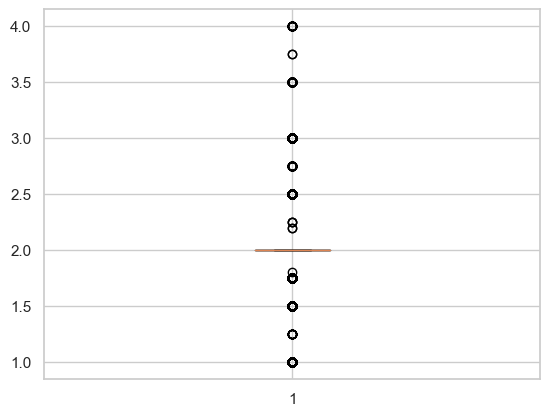

In [274]:
#remove less than 1 bathroom
data = data[data.BATHS >= 1]
plt.boxplot(data['BATHS'])

<AxesSubplot: xlabel='BATHS', ylabel='PRICE'>

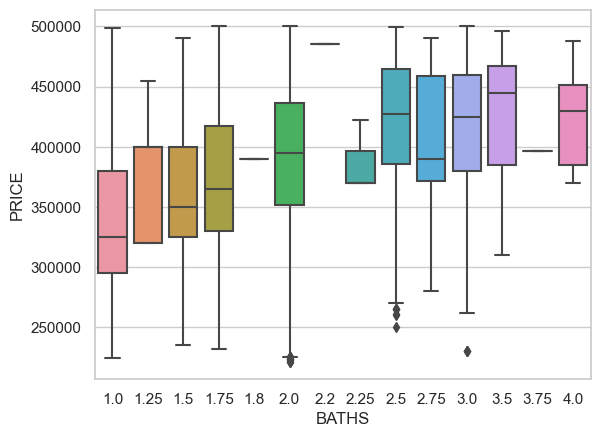

In [275]:
#view the relationship between bathrooms and price after removing outliers
sn.set(style = 'whitegrid')
sn.boxplot(x='BATHS',
           y='PRICE',
           data = data)

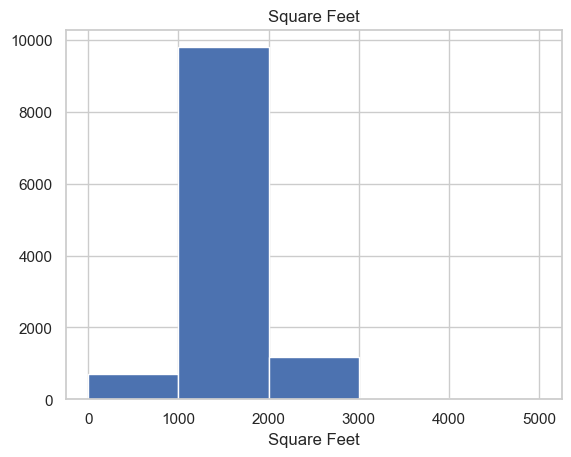

In [276]:
#view distribution of house square footage
plt.hist(data['SQFT'], bins= [0,1000,2000,3000,4000,5000])
plt.title('Square Feet')
plt.xlabel('Square Feet')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2f685c91310>,
 'caps': [<matplotlib.lines.Line2D at 0x2f685c91640>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f685c91d60>],
 'medians': [<matplotlib.lines.Line2D at 0x2f685caa280>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f685caa040>],
 'means': []}

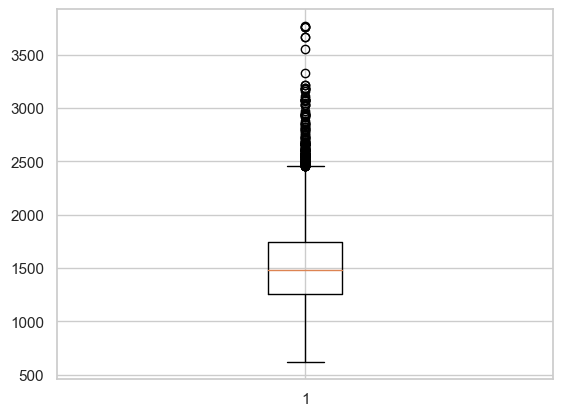

In [277]:
#view square footage as a boxplot
plt.boxplot(data['SQFT'])

Explore Lot Size

{'whiskers': [<matplotlib.lines.Line2D at 0x2f685cdde20>,
 'caps': [<matplotlib.lines.Line2D at 0x2f685cef3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f685cddb80>],
 'medians': [<matplotlib.lines.Line2D at 0x2f685cef8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f685cefb80>],
 'means': []}

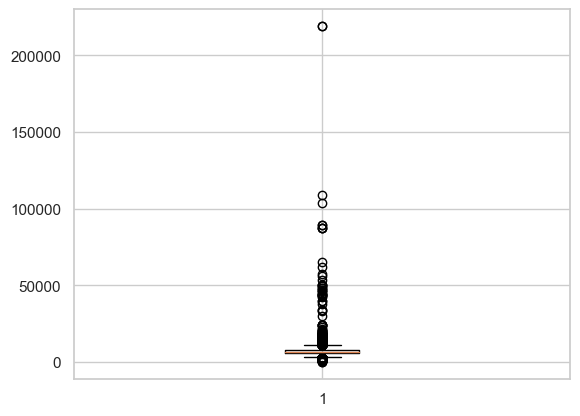

In [278]:
#view lot size in a boxplot to identify outliers
plt.boxplot(data['LOTSIZE'])

In [279]:
#Remove greater than 15,000sq ft and less than 3500 as unrealistic for price range
data = data[data.LOTSIZE < 15000]
data = data[data.LOTSIZE > 3500]

{'whiskers': [<matplotlib.lines.Line2D at 0x2f685d46c40>,
 'caps': [<matplotlib.lines.Line2D at 0x2f6f96704c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f685d469a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2f6be7f63a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f680135c10>],
 'means': []}

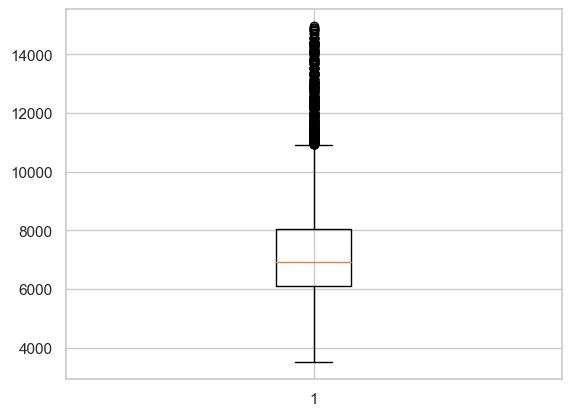

In [280]:
#view lotsize as a boxplot after removing outliers identified above
plt.boxplot(data['LOTSIZE'])

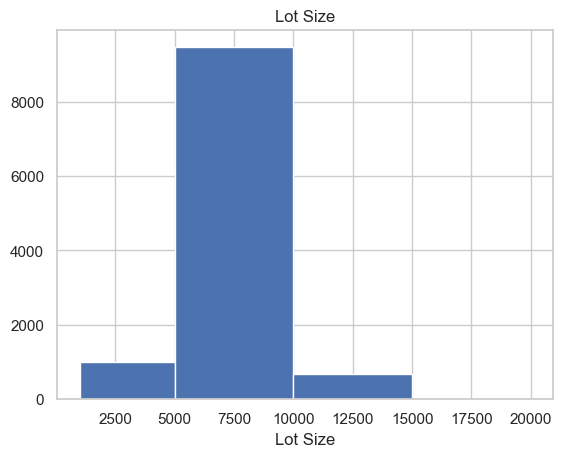

In [281]:
#view the distribution of houses by lotsize binning at 5000 sq ft intervals
plt.hist(data['LOTSIZE'], bins= [1000,5000,10000,15000,20000])
plt.title('Lot Size')
plt.xlabel('Lot Size')
plt.show()

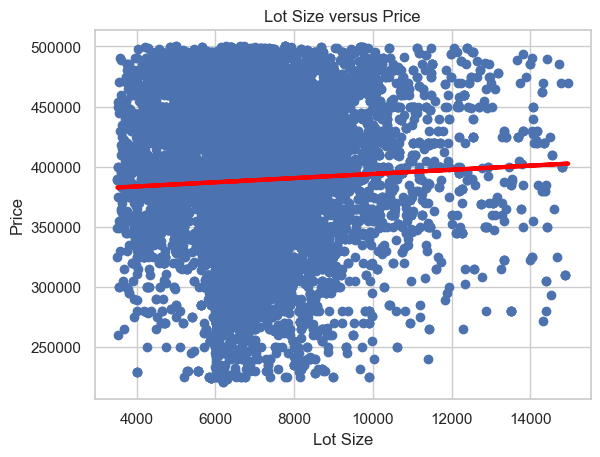

In [282]:
y=data['PRICE']
x=data['LOTSIZE']
plt.scatter(x,y)
plt.title('Lot Size versus Price')
plt.xlabel('Lot Size')
plt.ylabel('Price')

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x), color ='red', linewidth=3)

Explore Year Built

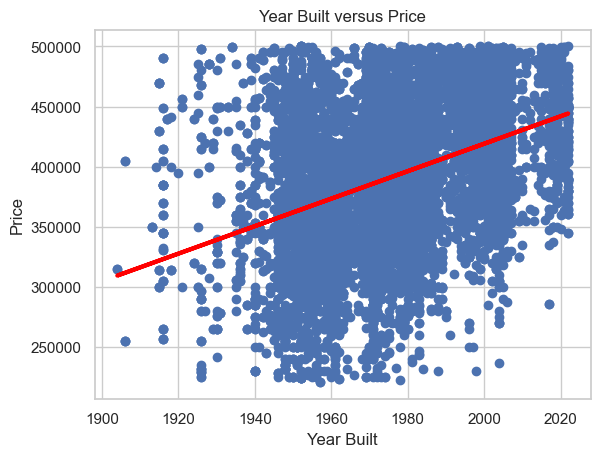

In [283]:
y=data['PRICE']
x=data['YEARBUILT']
plt.scatter(x,y)
plt.title('Year Built versus Price')
plt.xlabel('Year Built')
plt.ylabel('Price')

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x), color ='red', linewidth=3)

{'whiskers': [<matplotlib.lines.Line2D at 0x2f685d792b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2f685d797f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f685d46fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2f685d79d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f685d79fd0>],
 'means': []}

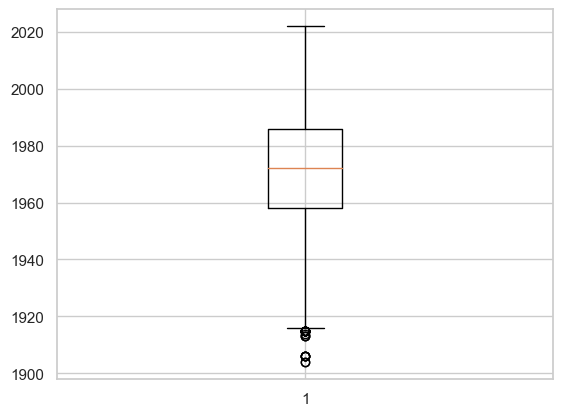

In [284]:
#view houses by year built to identify outliers
plt.boxplot(data['YEARBUILT'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2f685f03b80>,
 'caps': [<matplotlib.lines.Line2D at 0x2f685f13100>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f685f038e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2f685f13640>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f685f138e0>],
 'means': []}

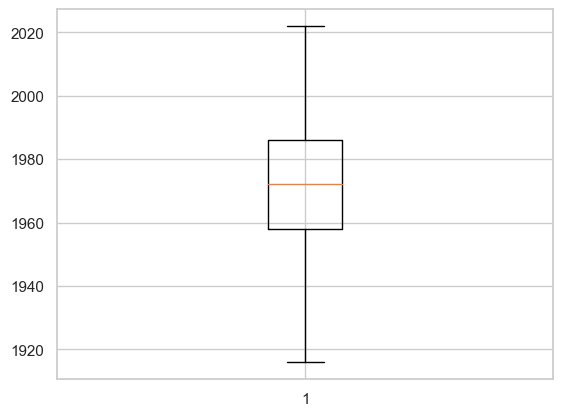

In [285]:
#Remove anything built before 1915
data = data[data.YEARBUILT > 1915]
plt.boxplot(data['YEARBUILT'])

Explore Mortgage Rates

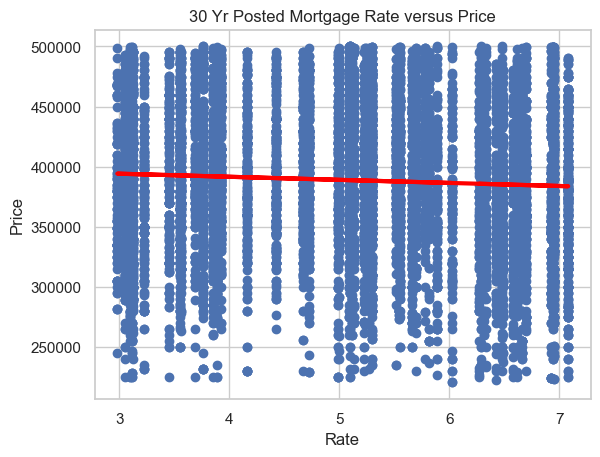

In [286]:
y=data['PRICE']
x=data['RATE']
plt.scatter(x,y)
plt.title('30 Yr Posted Mortgage Rate versus Price')
plt.xlabel('Rate')
plt.ylabel('Price')

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x), color ='red', linewidth=3)

In [287]:
#Remove Sold Date, Address, City, State or Provice, MLS#, Latitude and Longitude

model_data = data[['ZIPCODE','PRICE','BEDS','BATHS','SQFT','LOTSIZE','YEARBUILT','POOL','HOA','RATE']]


In [288]:
#view the first five rows of the model data and view the statistical data
model_data.head()
model_data.describe()

,ZIPCODE,PRICE,BEDS,BATHS,SQFT,LOTSIZE,YEARBUILT,POOL,HOA,RATE
count,11138.000000,11138.000000,11138.000000,11138.000000,11138.000000,11138.000000,11138.000000,11138.000000,11138.000000,11138.000000
mean,85031.244658,389081.565362,3.232896,1.965811,1513.171575,7156.721314,1973.829592,0.160083,0.226971,4.979815
std,16.274615,60902.564563,0.655809,0.453167,373.280027,1732.882138,20.347503,0.366699,0.418892,1.282978
min,85003.000000,220500.000000,2.000000,1.000000,618.000000,3508.000000,1916.000000,0.000000,0.000000,2.980000
25%,85019.000000,346000.000000,3.000000,2.000000,1256.000000,6103.000000,1958.000000,0.000000,0.000000,3.760000
50%,85032.000000,390000.000000,3.000000,2.000000,1476.000000,6930.000000,1972.000000,0.000000,0.000000,5.110000
75%,85041.000000,438000.000000,4.000000,2.000000,1740.000000,8032.000000,1986.000000,0.000000,0.000000,5.890000
max,85087.000000,499999.000000,5.000000,4.000000,3770.000000,14963.000000,2022.000000,1.000000,1.000000,7.080000


Heatmap of numerical values

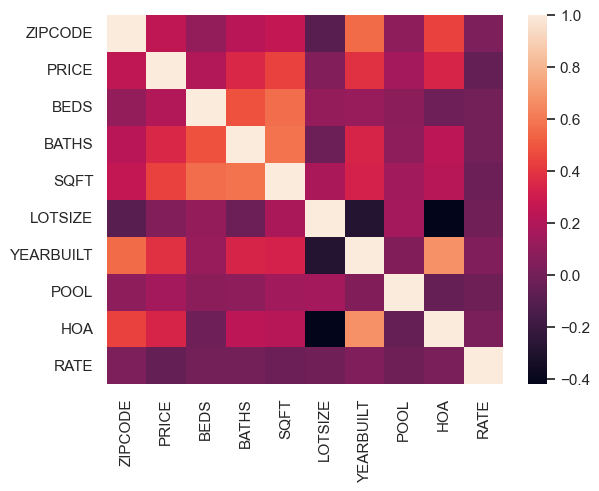

In [289]:
ax = sn.heatmap(data = model_data.corr())

In [290]:
#correlation matrix of the model data
corr_matrix = model_data.corr()
corr_matrix['PRICE'].sort_values(ascending=False)


PRICE        1.000000
SQFT         0.443568
YEARBUILT    0.386119
BATHS        0.353641
HOA          0.335034
ZIPCODE      0.250123
BEDS         0.205814
POOL         0.154119
LOTSIZE      0.050606
RATE        -0.053843
Name: PRICE, dtype: float64

In [291]:
#view data types of the model data
model_data.dtypes

ZIPCODE        int64
PRICE        float64
BEDS           int32
BATHS        float64
SQFT           int64
LOTSIZE        int64
YEARBUILT      int64
POOL           int32
HOA            int32
RATE         float64
dtype: object

#### Build Models

In [292]:
#build the datasets removing the dependent variable PRICE from the set of independent variables
X = model_data.drop('PRICE', axis = 1)
y = model_data['PRICE']


In [293]:
#scale the feature variables
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[-1.55123738, -1.88004598, -2.13134125, ...,  2.29058401,
        -0.54185983,  0.81079492],
       [-1.48978923,  1.16975771,  0.07544851, ...,  2.29058401,
        -0.54185983,  0.53018504],
       [-1.48978923, -1.88004598, -2.13134125, ...,  2.29058401,
        -0.54185983,  1.52790904],
       ...,
       [ 3.36461415, -0.35514414,  1.17884339, ..., -0.43656989,
         1.84549571,  1.53570376],
       [ 3.36461415, -1.88004598,  0.07544851, ..., -0.43656989,
         1.84549571,  1.03684176],
       [ 3.36461415, -0.35514414,  0.07544851, ..., -0.43656989,
         1.84549571,  1.00566288]])

In [294]:
#build the test and train datasets using 80% of the dataset for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

After testing various models including Linear Regression, XGBoost Regression, KNeighbor Regression, Random Forest
Regression and ANN, the model with the highest R^2 score and the lowest MAE was the Random Forest Regression model.
After selecting the Random Forest Regessor model, GridSearchCV was used to find the best parameters.

In [295]:
#Using GridSearchCV found the best parameters for the random forest model
RandFor = RandomForestRegressor(bootstrap=False, max_features=5, n_estimators=375, random_state=10)
RandFor.fit(X_train,y_train)

y_pred = RandFor.predict(X_test)

In [296]:
print('MAE: ', mean_absolute_error(y_test,y_pred))
print('MSE: ', mean_squared_error(y_test,y_pred))
print('R2: ', r2_score(y_test,y_pred))
print('VarScore: ',explained_variance_score(y_test,y_pred) )
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred)))

MAE:  15931.627524835427
MSE:  755869659.0647352
R2:  0.8001049329738827
VarScore:  0.8001485884840136
RMSE:  27493.083840572253


C:\Users\belbi\AppData\Local\Temp\ipykernel_123424\1542007201.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(residuals)


<AxesSubplot: xlabel='PRICE', ylabel='Density'>

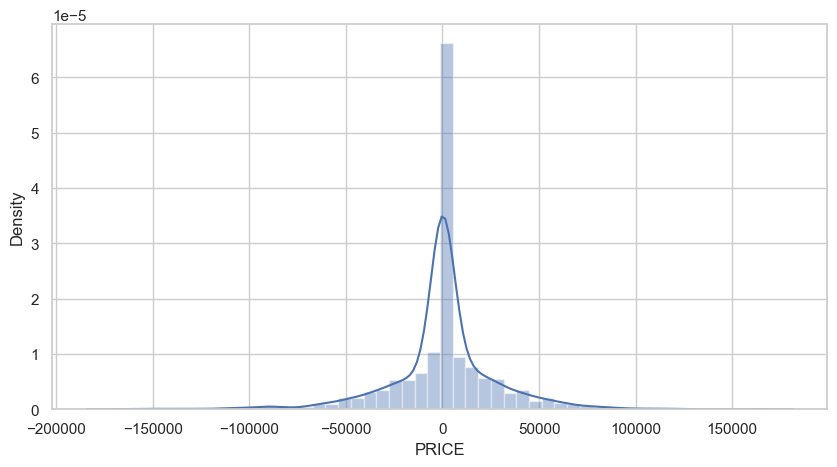

In [297]:
fig=plt.figure(figsize=(10,5))
residuals = (y_test - y_pred)
sn.distplot(residuals)


In [298]:
#change working directory
os.chdir(r"C:\Users\belbi\PycharmProject\Capstone")

In [299]:
## to test the model

testdata =pd.read_excel(r'C:\Users\belbi\PycharmProject\Capstone\testdata.xlsx',sheet_name='Sheet1')



In [300]:
datatest = scaler.transform(testdata)
prediction = RandFor.predict(datatest)
prediction

array([404893.57866667, 409609.11733333, 459530.59466667])

Save trained model

In [301]:
# pickle file to be used share model data with python pages used for Streamlit app

model = {"model": RandFor}
with open('trained_model.pkl','wb') as file:
    pickle.dump(model,file)


In [302]:
with open('trained_model.pkl','rb')as file:
    model = pickle.load(file)



In [303]:
# pickle file to be used to share standard scaler with python pages used for Streamlit app

with open('scaler.pkl' ,'wb') as f:
    pickle.dump(scaler,f)

In [304]:
with open('scaler.pkl','rb') as f:
    scaler=pickle.load(f)

In [305]:

# pickle file to be used to share data with python pages used for Streamlit app

with open('data.pkl','wb') as f:
    pickle.dump(data,f)


In [306]:
with open('data.pkl','rb') as f:
    data=pickle.load(f)

In [307]:
# pickle file to be used to share data with python pages used for Streamlit app

with open('modeldata.pkl','wb') as f:
    pickle.dump(model_data,f)

In [308]:
with open('modeldata.pkl','rb') as f:
    modeldata=pickle.load(f)